In [128]:
# SKTIME
# Period: quarterly, Metrics: Population
# datasets: https://www.sktime.org/en/stable/api_reference/datasets.html?highlight=datasets#

In [129]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import title
import pandas as pd
import pmdarima
import sktime
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
import numpy as np
from sktime.utils import plotting
from statsmodels.tsa.api import *
from sktime.registry import all_estimators
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.var import VAR

In [132]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting import plot_series
import seaborn as sns

In [199]:
# 1. plot the time series, use the dataset provided by sktime library with 1 Date variable and 1 Float variable

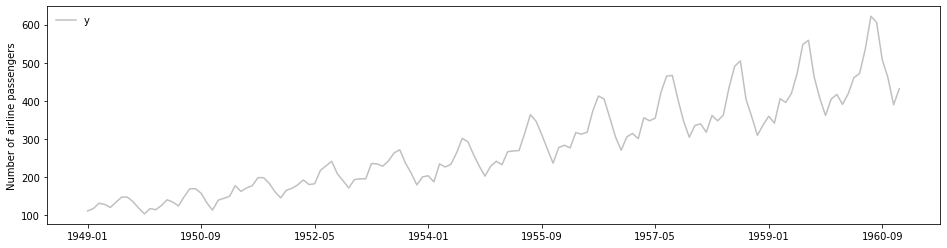

In [198]:
# define the time series
y = load_airline()

# plotting the graph of the basic series
fig, ax = plotting.plot_series(y, labels=["y"],markers=[''])
ax.legend(loc='upper left', frameon=False)

# define colors for line and legend
ax.get_lines()[0].set_c("silver")
leg = ax.get_legend()
leg.legendHandles[0].set_color('silver')

In [169]:
y

1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [135]:
# revise the type of series
y.dtypes

dtype('float64')

In [136]:
# the primary index of time series is Period
y.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', length=144)

In [82]:
# 2. plot the forecasted y
# forecasting horizon defines how many steps/periods ahead are forecasted
# there are many ways how to define forecasting horizon

In [137]:
fh = np.arange(1, 37) # the first 37 steps ahead
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [138]:
fh = np.array([2, 5])  # 2nd and 5th step ahead

In [141]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False)
fh

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [139]:
cutoff = pd.Period("1960-12", freq="M") # define the beginning

In [142]:
fh.to_relative(cutoff)

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64', is_relative=True)

In [143]:
fh.to_absolute(cutoff)

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [200]:
# data specification
y = load_airline()


# specify forecasting horizon
fh = np.arange(1, 37)

# specify the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# fit the forecaster
forecaster.fit(y)

# create predictions
y_pred = forecaster.predict(fh)

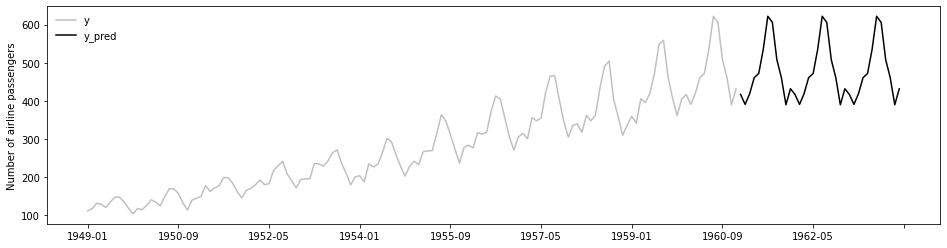

In [201]:
# plot predictions and past data
fig, ax = plotting.plot_series(y, y_pred, labels=["y", "y_pred"],markers=['',''])
ax.legend(loc='upper left', frameon=False)

ax.get_lines()[0].set_c("silver")
ax.get_lines()[-1].set_c("black")

leg = ax.get_legend()
leg.legendHandles[0].set_color('silver')
leg.legendHandles[-1].set_color('black')

In [146]:
# There are many sktime forecasters: NaiveForecaster, Thetaforecaster, 
# NaiveVariance, Arima, Exponential smoothing, Multiplex forecaster,
# TransformendTargetForecaster


In [214]:
# 3. Univariate Theta Forecaster

In [202]:
# until fit, define how many periods we want to forecast ahead, e.g. 19

y = load_airline()

fh = np.arange(1, 20)

forecaster = ThetaForecaster(sp=19)
forecaster.fit(y, fh=fh)

ThetaForecaster(sp=19)

In [203]:
# coverage has values between 0 and 1, it defines the width of filling
# coverage is a special parameter of predict_interval
coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

Coverage            
                0.9            
              lower       upper
1961-01  358.832855  513.418721
1961-02  358.907023  548.077036
1961-03  347.574555  565.917856
1961-04  324.508076  568.561965
1961-05  305.382881  572.685713
1961-06  279.265419  567.950901
1961-07  288.904115  597.494153
1961-08  287.475051  614.761340
1961-09  285.633563  630.604314
1961-10  274.000235  635.792057
1961-11  255.493034  633.357859
1961-12  246.323517  639.605006
1962-01  225.983936  634.100136
1962-02  234.368765  656.799040
1962-03  221.413956  657.688916
1962-04  237.332072  687.025684
1962-05  237.832456  700.555751
1962-06  228.819321  704.215315
1962-07  214.369306  702.108842

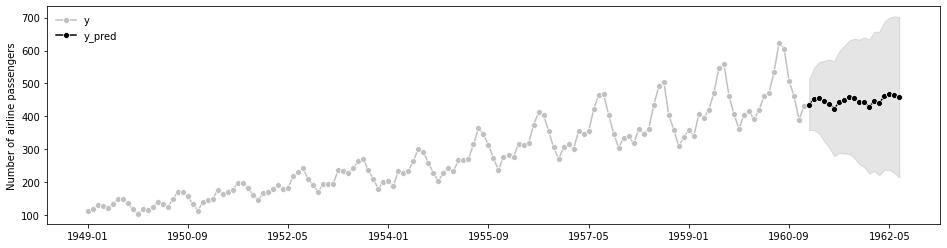

In [152]:
from sktime.utils import plotting

# create predictions
y_pred = forecaster.predict()

fig, ax = plotting.plot_series(y, y_pred, labels=["y", "y_pred"])
ax.get_lines()[0].set_c("silver") # set color for y line
ax.get_lines()[-1].set_c("black") # set color for y_pred line
ax.legend(loc='upper left', frameon=False)

ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["Coverage"][coverage]["lower"], # lower limit for filling
    y_pred_ints["Coverage"][coverage]["upper"], # upper limit for filling
    alpha=0.1,# transparency of filling
    color='k',
    label=f"{coverage}% prediction intervals",

)

In [153]:
ax.get_lines()[-1].get_c()

'black'

In [215]:
# 4. Univariate ARIMA with deseasonaliser and detrender
# TransformedTargetForecasted has hardcoded statistical methodology to consider the season and trend as well

In [204]:
from sktime.datasets import load_macroeconomic
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender

In [206]:
# use the available training time series dataset and only 1 Date variable and 1 Float variable
data = load_macroeconomic()
y = pd.Series(data["unemp"], name='Unemployment')

In [207]:
y

Period
1959Q1    5.8
1959Q2    5.1
1959Q3    5.3
1959Q4    5.6
1960Q1    5.2
         ... 
2008Q3    6.0
2008Q4    6.9
2009Q1    8.1
2009Q2    9.2
2009Q3    9.6
Freq: Q-DEC, Name: Unemployment, Length: 203, dtype: float64

In [208]:
# forecast 3 periods ahead
forecaster = TransformedTargetForecaster(
    [
        ("deseasonalize", Deseasonalizer(sp=12)), # get the trend for 12 periods, 12 quarters, 3 years
        ("detrend", Detrender()),
        ("forecast", ARIMA()),
    ]
)

forecaster.fit(y, fh=[1, 2, 3, 4, 5, 6, 7, 8, 9 ]) # forecast 9 periods, 9 quarters ahead
forecaster.predict_interval()

Coverage           
             0.9           
           lower      upper
2009Q4  8.949103  10.068284
2010Q1  8.639806  10.206350
2010Q2  8.438112  10.337207
2010Q3  8.253244  10.423975
2010Q4  8.029028  10.431633
2011Q1  7.866455  10.472162
2011Q2  7.743391  10.530044
2011Q3  7.518202  10.468011
2011Q4  7.448026  10.546276

In [209]:
forecaster.predict_quantiles()

Quantiles           
            0.05       0.95
2009Q4  8.949103  10.068284
2010Q1  8.639806  10.206350
2010Q2  8.438112  10.337207
2010Q3  8.253244  10.423975
2010Q4  8.029028  10.431633
2011Q1  7.866455  10.472162
2011Q2  7.743391  10.530044
2011Q3  7.518202  10.468011
2011Q4  7.448026  10.546276

In [210]:
forecaster = Deseasonalizer(sp=12) * Detrender() * ARIMA()

In [211]:
forecaster.fit(y, fh=[1, 2, 3, 4, 5, 6, 7, 8, 9])
forecaster.predict_interval()

Coverage           
             0.9           
           lower      upper
2009Q4  8.949103  10.068284
2010Q1  8.639806  10.206350
2010Q2  8.438112  10.337207
2010Q3  8.253244  10.423975
2010Q4  8.029028  10.431633
2011Q1  7.866455  10.472162
2011Q2  7.743391  10.530044
2011Q3  7.518202  10.468011
2011Q4  7.448026  10.546276

In [212]:
coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

Coverage           
             0.9           
           lower      upper
2009Q4  8.949103  10.068284
2010Q1  8.639806  10.206350
2010Q2  8.438112  10.337207
2010Q3  8.253244  10.423975
2010Q4  8.029028  10.431633
2011Q1  7.866455  10.472162
2011Q2  7.743391  10.530044
2011Q3  7.518202  10.468011
2011Q4  7.448026  10.546276

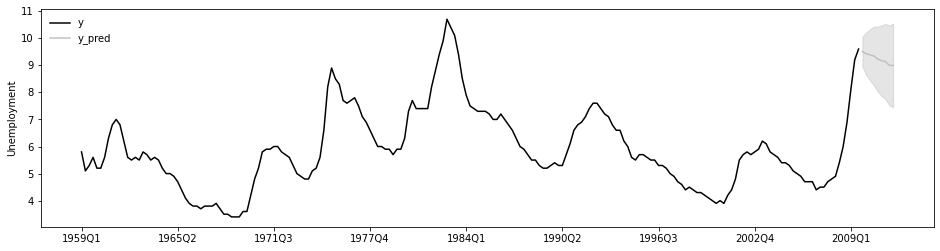

In [213]:
# create unemployment rate forecasts for given periods with lower and upper limits
# see how the each further period has less clear forecasted values / variance / higher error
y_pred = forecaster.predict()

fig, ax = plotting.plot_series(y, y_pred, labels=["y", "y_pred"],markers=['',''])
ax.get_lines()[0].set_c("black") # set color for y line
ax.get_lines()[-1].set_c("silver") # set color for y_pred line
ax.legend(loc='upper left', frameon=False)

leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[-1].set_color('silver')

ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["Coverage"][coverage]["lower"], # lower limit for filling
    y_pred_ints["Coverage"][coverage]["upper"], # upper limit for filling
    alpha=0.1,# transparency of filling
    color='k',
    label=f"{coverage}% prediction intervals",

)
